In [1]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt

Using MPI version 4.0, 1 processes


In [2]:
n = 3          # index of square grating
a = 1.2            # period 
d = 0.5*a            # side of square
t = 0.2          # thickness of grating
dpml = 2         # PML thickness
pad = 2          # padding between grating and PML

pol = mp.Ex

In [3]:
from meep.materials import Ag

block = mp.Block(size=mp.Vector3(d,t), center=mp.Vector3(), material=Ag)
# block = mp.Block(size=mp.Vector3(d,t), center=mp.Vector3(), material=mp.Medium(index=n))

In [4]:
fcen = 1
df = 0.8
nfreqs = 300

src = mp.Source(src=mp.GaussianSource(fcen, fwidth=df), component=pol, center=mp.Vector3(y=-t/2-pad+0.1), size=mp.Vector3(a))

In [5]:
cell = mp.Vector3(a, 2*(t/2+pad+dpml))

sim = mp.Simulation(cell_size=cell,
                    default_material=mp.Medium(index=1),
                    geometry=[block],
                    sources=[src],
                    resolution=50,
                    boundary_layers=[mp.PML(dpml, direction=mp.Y)],
                    k_point=mp.Vector3())

refl = sim.add_mode_monitor(fcen, df, nfreqs, mp.FluxRegion(center=mp.Vector3(y=-t/2-pad+0.2), size=mp.Vector3(a,0)))
tran = sim.add_mode_monitor(fcen, df, nfreqs, mp.FluxRegion(center=mp.Vector3(y=t/2+pad-0.1), size=mp.Vector3(a,0)))

/home/gridsan/mcomella/.conda/envs/pmp/lib/python3.10/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/gridsan/mcomella/.conda/envs/pmp/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


     block, center = (0,0,0)
          size (0.6,0.2,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)


<AxesSubplot:xlabel='X', ylabel='Y'>

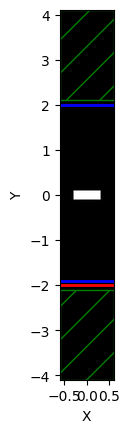

In [6]:
sim.plot2D(output_plane=mp.Volume(center=mp.Vector3(), size=mp.Vector3(a, 2*(t/2+pad+dpml))))

In [7]:
pt = mp.Vector3(y=t/2+pad-0.1) # Point to check field
sim.run(until_after_sources=mp.stop_when_fields_decayed(100, pol, pt, 1e-3))

-----------
Initializing structure...
time for choose_chunkdivision = 0.001441 s
Working in 2D dimensions.
Computational cell is 1.2 x 8.2 x 0 with resolution 50
     block, center = (0,0,0)
          size (0.6,0.2,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 0.030302 s
lorentzian susceptibility: frequency=16.365, gamma=1.95106
lorentzian susceptibility: frequency=7.32593, gamma=0.738804
lorentzian susceptibility: frequency=6.60165, gamma=0.052426
lorentzian susceptibility: frequency=3.61417, gamma=0.364563
lorentzian susceptibility: frequency=0.658148, gamma=3.13427
drude susceptibility: frequency=1e-10, gamma=0.0387146
-----------
on time step 5944 (time=59.44), 0.00067303 s/step
field decay(t = 100.01): 0.039996455618020614 / 0.039996455618020614 = 1.0
on time step 11188 (time=111.88), 0.000762793 s/step
on time step 16845 (time=168.45), 0.000707186 s/step
field decay(t = 200.02): 5.083013917207997e-07 / 

     block, center = (0,0,0)
          size (0.6,0.2,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
Normalizing field data...
run 1 finished at t = 205.02 (20502 timesteps)


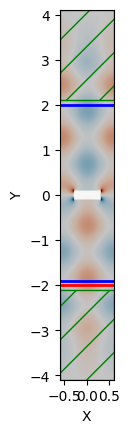

In [8]:
animate = mp.Animate2D(sim, fields=pol, normalize=True)
sim.run(mp.at_every(0.4/10,animate),until=5)

In [ ]:
filename = "square-cavity1.mp4"
fps = 10
animate.to_mp4(fps,filename)
Video(filename)

In [9]:
p1_coeff = sim.get_eigenmode_coefficients(refl, [1]).alpha[0]
p2_coeff = sim.get_eigenmode_coefficients(tran, [1]).alpha[0]

c1 = np.array([coef[1] for coef in p1_coeff])
c2 = np.array([coef[0] for coef in p2_coeff])
c3 = np.array([coef[0] for coef in p1_coeff])

MPB solved for frequency_1(0,0.6,0) = 0.6 after 9 iters
Dominant planewave for band 1: (0.000000,0.600000,0.000000)
MPB solved for frequency_1(0,0.602676,0) = 0.602676 after 9 iters
Dominant planewave for band 1: (0.000000,0.602676,0.000000)
MPB solved for frequency_1(0,0.605351,0) = 0.605351 after 9 iters
Dominant planewave for band 1: (0.000000,0.605351,0.000000)
MPB solved for frequency_1(0,0.608027,0) = 0.608027 after 9 iters
Dominant planewave for band 1: (0.000000,0.608027,0.000000)
MPB solved for frequency_1(0,0.610702,0) = 0.610702 after 9 iters
Dominant planewave for band 1: (0.000000,0.610702,0.000000)
MPB solved for frequency_1(0,0.613378,0) = 0.613378 after 9 iters
Dominant planewave for band 1: (0.000000,0.613378,0.000000)
MPB solved for frequency_1(0,0.616054,0) = 0.616054 after 9 iters
Dominant planewave for band 1: (0.000000,0.616054,0.000000)
MPB solved for frequency_1(0,0.618729,0) = 0.618729 after 9 iters
Dominant planewave for band 1: (0.000000,0.618729,0.000000)
MP

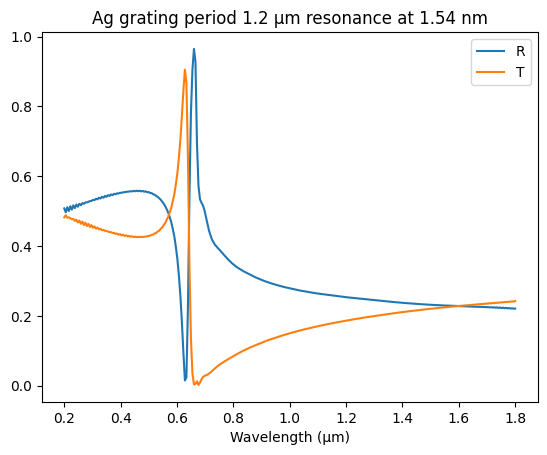

In [10]:
freqs = np.linspace(fcen-df, fcen+df, nfreqs)
wl = 1/freqs
R = np.abs(c1)**2 / np.abs(c3)**2
T = np.abs(c2)**2 / np.abs(c3)**2

res_freq = 0.5*(wl[np.argmax(T)]+wl[np.argmin(T)])

plt.plot(freqs, R, label='R')
plt.plot(freqs, T, label='T')
plt.title('Ag grating period %.1f µm resonance at %.2f nm' % (a, res_freq))
# plt.xlabel('Wavelength (µm)')
plt.legend()
title = 'square_grating_%.2fum' % res_freq
# plt.savefig('results/'+title+'.png')

In [11]:
0.5*(wl[np.argmax(T)]+wl[np.argmin(T)])

1.5354266013152449

     block, center = (0,0,0)
          size (0.6,0.2,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)


<AxesSubplot:xlabel='X', ylabel='Y'>

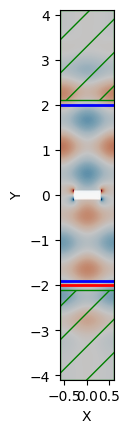

In [12]:
sim.plot2D(fields=pol, output_plane=mp.Volume(center=mp.Vector3(), size=mp.Vector3(a, 2*(t/2+pad+dpml))))